In [1]:
import numpy as np
from functools import reduce
from itertools import combinations, combinations_with_replacement 

def cartesian_product_transpose(arrays):
    broadcastable = np.ix_(*arrays)
    broadcasted = np.broadcast_arrays(*broadcastable)
    rows, cols = reduce(np.multiply, broadcasted[0].shape), len(broadcasted)
    dtype = np.find_common_type([a.dtype for a in arrays], [])

    out = np.empty(rows * cols, dtype=dtype)
    start, end = 0, rows
    for a in broadcasted:
        out[start:end] = a.reshape(-1)
        start, end = end, end + rows
    return out.reshape(cols, rows).T

In [1]:
1412040/500

2824.08

In [12]:
point_range = np.arange(-100, 101, 4, dtype=np.int16)

In [13]:
point_range

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96,  100], dtype=int16)

In [14]:
pos = cartesian_product_transpose([point_range, point_range])
pos.shape

(2601, 2)

In [15]:
pos_list = list(combinations(pos, 2))

In [16]:
len(pos_list)

3381300

---

In [2]:
from mc_moea import *

import imageio

import pickle
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


---

In [4]:
fname_l = glob.glob("solutions/*.pkl.bz2")

In [23]:
solutions = pd.read_pickle("solutions/solution-1000.pkl.bz2")

In [24]:
solutions

,solution_id,solution_obj,from_generation,from_method,signal_strength,construction_cost,num_orphans,fitness_value
0,a1400162-fd5f-4564-8393-c7e93066bdd0,Solution : a1400162-fd5f-4564-8393-c7e93066bdd...,999,Mutation,-97.556315,10440000,0,1.147876
1,7d26d624-6ba4-4aad-b6a8-5adad7b28117,Solution : 7d26d624-6ba4-4aad-b6a8-5adad7b2811...,999,Mutation,-97.581449,10440000,0,1.148104
2,a0cba035-31bf-48aa-8a9c-1ac29b76d1db,Solution : a0cba035-31bf-48aa-8a9c-1ac29b76d1d...,999,Mutation,-97.581449,10440000,0,1.148104
3,e6341d4f-ac51-4660-8b94-8f9161f28c47,Solution : e6341d4f-ac51-4660-8b94-8f9161f28c4...,999,Mutation,-97.648610,10440000,0,1.148715
4,feaa2355-8cad-460a-af65-bb192668c62a,Solution : feaa2355-8cad-460a-af65-bb192668c62...,997,Crossover,-98.505421,10160000,0,1.149504
...,...,...,...,...,...,...,...,...
295,634172c7-35a0-4176-9be9-d3feef9e2b5c,Solution : 634172c7-35a0-4176-9be9-d3feef9e2b5...,1000,Crossover,-100.124262,9820000,300,1.455721
296,be4fe314-6c7e-4de7-9d54-ac9d8dfcc23b,Solution : be4fe314-6c7e-4de7-9d54-ac9d8dfcc23...,1000,Mutation,-100.535757,21780000,0,1.458461
297,9b651c0c-33c6-4684-92a1-d456292def18,Solution : 9b651c0c-33c6-4684-92a1-d456292def1...,1000,Crossover,-100.734999,9820000,300,1.461273
298,543ce218-f49b-47ca-a6bc-c4973a43d2d4,Solution : 543ce218-f49b-47ca-a6bc-c4973a43d2d...,1000,Crossover,-101.387943,9820000,300,1.467209


In [25]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])

Text(0.5, 1.0, 'Pattern I (P = 0.32)')

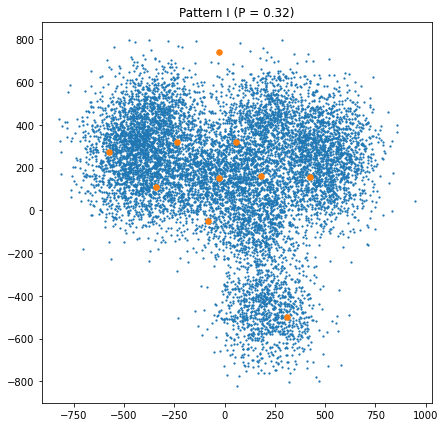

In [27]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])
plt.figure(figsize=(7,7))
plt.scatter(data[1][:,0], data[1][:,1], s=1.5)
plt.scatter(pos[:,0], pos[:,1], s=30)
plt.title("Pattern I (P = 0.32)")

In [22]:
for i in tqdm(range(solutions.shape[0])):
    pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[i].stations])
    plt.figure(figsize=(7,7))
    plt.scatter(data[0][:,0], data[0][:,1], s=1.5)
    plt.scatter(pos[:,0], pos[:,1], s=30)
    plt.title(f"Fitness: {solutions['solution_obj'].iloc[i].fitness:.4f}")
    plt.suptitle(f'Solutions from Iter: {i:04d}', fontsize=16)
    plt.savefig(f"figure/test/output-{i:04d}.png")
    plt.close()

  0%|          | 0/20 [00:00<?, ?it/s]

---

In [19]:
data = []
fnames = glob.glob("position/*.dat")
for fname in fnames:
    X = pickle.load(open(fname, "rb"))
    data.append(X)

In [20]:
bound_max = 800
bound_min = -800

In [29]:
for i in tqdm(range(solutions.shape[0])):
    pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[i].stations])
    fig, axs = plt.subplots(2,3, figsize=(17,10), sharex=True, sharey=True)
    fig.suptitle(f'Solutions from Iter: {i:04d}', fontsize=16)
    plt.xlim(-900, 900)
    plt.ylim(-900, 900)

    axs[0][0].scatter(data[0][:,0], data[0][:,1], s=1.5)
    axs[0][0].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][0].set_title("Pattern I (P = 0.32)")

    axs[0][1].scatter(data[1][:,0], data[1][:,1], s=1.5)
    axs[0][1].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][1].set_title("Pattern II (P = 0.25)")

    axs[0][2].scatter(data[2][:,0], data[2][:,1], s=1.5)
    axs[0][2].scatter(pos[:,0], pos[:,1], s=30)
    axs[0][2].set_title("Pattern III (P = 0.17)")

    axs[1][0].scatter(data[3][:,0], data[3][:,1], s=1.5)
    axs[1][0].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][0].set_title("Pattern IV (P = 0.14)")

    axs[1][1].scatter(data[4][:,0], data[4][:,1], s=1.5)
    axs[1][1].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][1].set_title("Pattern V (P = 0.09)")

    axs[1][2].scatter(data[5][:,0], data[5][:,1], s=1.5)
    axs[1][2].scatter(pos[:,0], pos[:,1], s=30)
    axs[1][2].set_title("Pattern VI (P = 0.03)")

    plt.savefig(f"figure/iter_best_001-{i:04d}.png")
    plt.close()

  0%|          | 0/101 [00:00<?, ?it/s]

In [32]:
with imageio.get_writer('figure/iter_best_001-animated.gif', mode='I', duration = 0.5) as writer:
    for filename in sorted(glob.glob("figure/iter_best_001*.png")):
        image = imageio.imread(filename)
        writer.append_data(image)

/tmp/ipykernel_255203/2258210362.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [4]:
solutions = pd.read_pickle("solutions/solution-0760.pkl.bz2")

In [9]:
solutions.groupby("from_generation")[["solution_id"]].count().sort_index()

,solution_id
from_generation,
422,1
432,1
438,1
445,1
452,1
...,...
755,2
757,2
758,6


---

# POC visualization

In [17]:
poc_solutions = []
fnames = ["solutions/poc/solution-INIT.pkl.bz2"] + sorted(glob.glob("solutions/poc/*.pkl.bz2"))
for fname in tqdm(fnames):
    poc_solutions.append(pd.read_pickle(fname))

  0%|          | 0/102 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [103]:
data = pd.read_pickle("solutions/poc/solution-0100.pkl.bz2")

In [104]:
data.head()

,solution_id,solution_obj,from_generation,from_method,signal_strength,construction_cost,num_orphans,fitness_value
0,a94a8234-02e4-46dd-ab6a-4df4cd7ce7d0,Solution : a94a8234-02e4-46dd-ab6a-4df4cd7ce7d...,87,Crossover,-89.053356,4050000,0,0.910826
1,69190b01-aaad-4545-ae36-eb4ef3360e29,Solution : 69190b01-aaad-4545-ae36-eb4ef3360e2...,90,Crossover,-89.053356,4050000,0,0.910826
2,f741571d-baeb-4398-bd90-f5df9a1497ed,Solution : f741571d-baeb-4398-bd90-f5df9a1497e...,98,Crossover,-89.053356,4050000,0,0.910826
3,74f2f0a3-729f-48ce-997e-09e77068f4ae,Solution : 74f2f0a3-729f-48ce-997e-09e77068f4a...,80,Crossover,-89.120320,4050000,0,0.911435
4,3f4ac814-02ac-4e60-bf75-6f44c15154ec,Solution : 3f4ac814-02ac-4e60-bf75-6f44c15154e...,38,Crossover,-89.120320,4050000,0,0.911435


In [117]:
[print(x) for x in data["solution_obj"].iloc[0].stations]

Station
	Name: c9ec0eee-7728-4681-af24-78cf0ce21734
	Type: 2600 MHz Type II
	Position: (61, -60)
	Frequency: 2600
	Capacity: 1131/1300
	Cost: 1350000
        
Station
	Name: e7f3e14a-4501-4c39-8613-1a865342052d
	Type: 2600 MHz Type II
	Position: (-71, -37)
	Frequency: 2600
	Capacity: 929/1300
	Cost: 1350000
        
Station
	Name: c3394096-e468-43a0-bc33-3e4d1479c4c8
	Type: 2600 MHz Type II
	Position: (-47, 35)
	Frequency: 2600
	Capacity: 940/1300
	Cost: 1350000
        


[None, None, None]

In [3]:
upper_bound = 200
lower_bound = -200

In [118]:
poc_position = pickle.load(open("poc_position-2.pkl", "rb"))

In [120]:
station_pos = np.array([[s.x, s.y] for s in data["solution_obj"].iloc[0].stations])

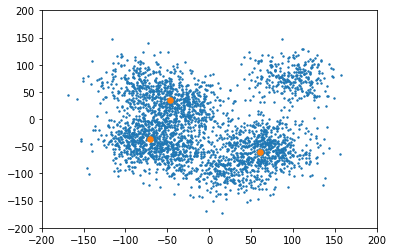

In [121]:
plt.scatter(poc_position[:,0], poc_position[:,1], s=2)
plt.scatter(station_pos[:,0], station_pos[:,1], s=30)
plt.xlim((lower_bound, upper_bound))
plt.ylim((lower_bound, upper_bound))
plt.show()

In [6]:
poc_solutions[0]

,solution_id,solution_obj,from_generation,from_method,signal_strength,construction_cost,num_orphans,fitness_value
70,28c76b41-8124-43fc-b1b3-800f4db62b20,Solution : 28c76b41-8124-43fc-b1b3-800f4db62b2...,-1,Randomize,-92.006518,10360000,0,1.095423
146,587c2dcd-20cc-4db1-bf5c-545af85d8307,Solution : 587c2dcd-20cc-4db1-bf5c-545af85d830...,-1,Randomize,-90.873606,10840000,0,1.097124
75,63597948-c5f6-49f7-b76a-22546cc20bae,Solution : 63597948-c5f6-49f7-b76a-22546cc20ba...,-1,Randomize,-92.606010,10240000,0,1.097873
14,95f87f9f-9b0f-49f7-b34c-78e7af3338c8,Solution : 95f87f9f-9b0f-49f7-b34c-78e7af3338c...,-1,Randomize,-90.456616,11110000,0,1.100083
193,ed0ab2c5-4ee9-4fd4-b7d3-95285470850c,Solution : ed0ab2c5-4ee9-4fd4-b7d3-95285470850...,-1,Randomize,-93.263582,10160000,0,1.101851
...,...,...,...,...,...,...,...,...
247,e6743738-7d45-4294-89ff-f757e22db977,Solution : e6743738-7d45-4294-89ff-f757e22db97...,-1,Randomize,-96.533691,12860000,0,1.199079
126,c5b47e52-0309-4f61-b19b-e8ff0c648fde,Solution : c5b47e52-0309-4f61-b19b-e8ff0c648fd...,-1,Randomize,-97.135706,12950000,0,1.206802
107,7adf0a63-3482-44bd-a137-51c85c30b74a,Solution : 7adf0a63-3482-44bd-a137-51c85c30b74...,-1,Randomize,-98.566964,12440000,0,1.207063
94,46b5faf7-addb-49e2-8498-d27a764cbe16,Solution : 46b5faf7-addb-49e2-8498-d27a764cbe1...,-1,Randomize,-99.173540,12780000,0,1.221078


In [47]:
for i in tqdm(range(len(poc_solutions))):
    pos = np.array([[s.x, s.y] for s in poc_solutions[i]["solution_obj"].iloc[0].stations])
    fitness = poc_solutions[i]["fitness_value"].iloc[0]
    from_gen = poc_solutions[i]["from_generation"].iloc[0]
    method = poc_solutions[i]["from_method"].iloc[0]
    txt = f"""Best of generation {i}
    from_gen: {from_gen}, from_method: {method}, n_stations: {len(pos)}, fitness: {fitness:.5f}
    station_location: \n{pos}
    """
    plt.scatter(poc_position[:,0], poc_position[:,1], s=5)
    plt.scatter(pos[:,0], pos[:,1], s=30)
    plt.xlim((lower_bound, upper_bound))
    plt.ylim((lower_bound, upper_bound))
    plt.figtext(1.5, 0.85, txt, wrap=True, va="top", ha='center', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"figure/poc/poc_iter_best_001-{i:04d}.png", bbox_inches = "tight", dpi=150)
    plt.close()

  0%|          | 0/102 [00:00<?, ?it/s]

In [48]:
with imageio.get_writer('figure/poc/poc_iter_best_animated.gif', mode='I', duration = 0.5) as writer:
    for filename in tqdm(sorted(glob.glob("figure/poc/poc_iter_best_001*.png"))):
        image = imageio.imread(filename)
        writer.append_data(image)

  0%|          | 0/102 [00:00<?, ?it/s]

/tmp/ipykernel_1683/50978801.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


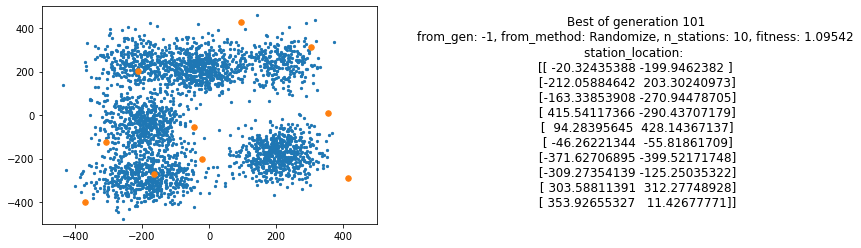

In [46]:
pos = np.array([[s.x, s.y] for s in poc_solutions[0]["solution_obj"].iloc[0].stations])
fitness = poc_solutions[0]["fitness_value"].iloc[0]
from_gen = poc_solutions[0]["from_generation"].iloc[0]
method = poc_solutions[0]["from_method"].iloc[0]
txt = f"""Best of generation {i}
from_gen: {from_gen}, from_method: {method}, n_stations: {len(pos)}, fitness: {fitness:.5f}
station_location: \n{pos}
"""
plt.scatter(poc_position[:,0], poc_position[:,1], s=5)
plt.scatter(pos[:,0], pos[:,1], s=30)
plt.xlim((lower_bound, upper_bound))
plt.ylim((lower_bound, upper_bound))
plt.figtext(1.5, 0.85, txt, wrap=True, va="top", ha='center', fontsize=12)
plt.savefig(f"test.png", bbox_inches = "tight")
plt.show()

In [59]:
pos

array([[ 141.57675234, -373.49806056],
       [-451.48503231,  255.95248575],
       [ 112.09516338, -295.89869944],
       [ -65.13543385,  155.86280521]])

In [60]:
i = 0

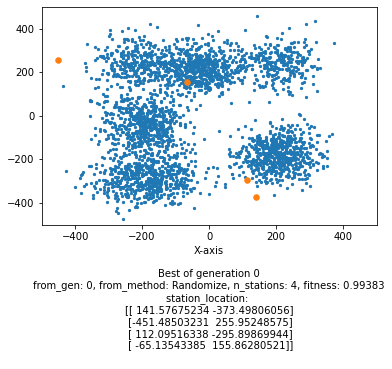

In [68]:
plt.scatter(poc_position[:,0], poc_position[:,1], s=5)
plt.scatter(pos[:,0], pos[:,1], s=30)
plt.xlim((lower_bound, upper_bound))
plt.ylim((lower_bound, upper_bound))
plt.xlabel(f"""X-axis\n
Best of generation {i}
from_gen: {from_gen}, from_method: {method}, n_stations: {len(pos)}, fitness: {fitness:.5f}
station_location: \n{pos}
""")
plt.show()

In [3]:
data = []
fnames = glob.glob("position/*.dat")
for fname in fnames:
    X = pickle.load(open(fname, "rb"))
    data.append(X)

In [4]:
data[0]

array([[-396.09865766,  408.02142988],
       [ -92.13101523,  422.84689583],
       [-575.79358938, -439.44277874],
       ...,
       [-270.25743182,  246.32949935],
       [-219.07467894,  596.03036292],
       [-141.86069516,  444.07049984]])

Text(0.5, 1.0, 'Pattern VI (P = 0.03)')

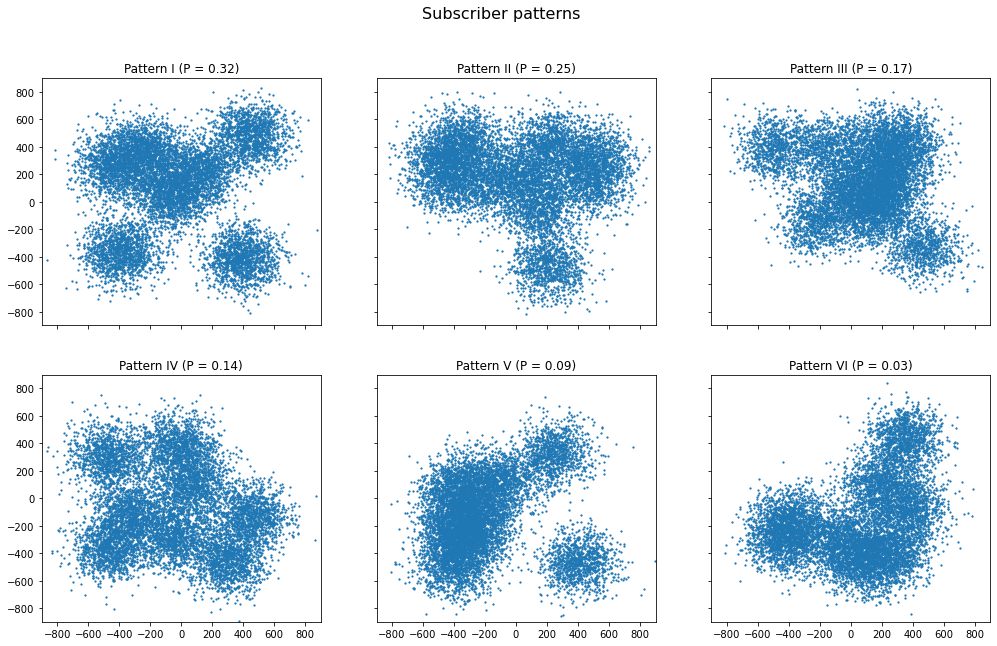

In [7]:
fig, axs = plt.subplots(2,3, figsize=(17,10), sharex=True, sharey=True)
fig.suptitle(f'Subscriber patterns', fontsize=16)
plt.xlim(-900, 900)
plt.ylim(-900, 900)

axs[0][0].scatter(data[0][:,0], data[0][:,1], s=1.5)
axs[0][0].set_title("Pattern I (P = 0.32)")

axs[0][1].scatter(data[1][:,0], data[1][:,1], s=1.5)
axs[0][1].set_title("Pattern II (P = 0.25)")

axs[0][2].scatter(data[2][:,0], data[2][:,1], s=1.5)
axs[0][2].set_title("Pattern III (P = 0.17)")

axs[1][0].scatter(data[3][:,0], data[3][:,1], s=1.5)
axs[1][0].set_title("Pattern IV (P = 0.14)")

axs[1][1].scatter(data[4][:,0], data[4][:,1], s=1.5)
axs[1][1].set_title("Pattern V (P = 0.09)")

axs[1][2].scatter(data[5][:,0], data[5][:,1], s=1.5)
axs[1][2].set_title("Pattern VI (P = 0.03)")

In [41]:
solutions = pd.read_pickle("solutions/active_run/solution-0220.pkl.bz2")

In [42]:
solutions

,solution_id,solution_obj,from_generation,from_method,signal_strength,construction_cost,num_orphans,fitness_value
0,248dd033-90d3-413b-9669-9713f3097bc3,Solution : 248dd033-90d3-413b-9669-9713f3097bc...,209,Crossover,-99.788884,9960000,0,1.156172
1,9db41ffd-62de-4692-8998-5b8a4c206bf7,Solution : 9db41ffd-62de-4692-8998-5b8a4c206bf...,167,Crossover,-99.789686,9960000,0,1.156179
2,86d3855e-54db-44d6-aa85-650bfa9779a1,Solution : 86d3855e-54db-44d6-aa85-650bfa9779a...,110,Mutation,-99.789686,9960000,0,1.156179
3,88e53ef9-8d1f-418d-8f36-fef6ff095a2b,Solution : 88e53ef9-8d1f-418d-8f36-fef6ff095a2...,134,Crossover,-99.789686,9960000,0,1.156179
4,71b91109-2a91-4d1a-b7ac-8923c8dd1f66,Solution : 71b91109-2a91-4d1a-b7ac-8923c8dd1f6...,204,Crossover,-99.894616,9960000,0,1.157133
...,...,...,...,...,...,...,...,...
295,813913e0-9d59-40a7-bb82-20b987c52d9f,Solution : 813913e0-9d59-40a7-bb82-20b987c52d9...,220,Randomize,-109.486264,7180000,3750,4.924830
296,791eba2b-afec-4689-9ee5-ec318fff47e5,Solution : 791eba2b-afec-4689-9ee5-ec318fff47e...,220,Randomize,-106.614274,7050000,3800,4.945471
297,528177c3-a80c-4a43-9241-c0dc1b2efde0,Solution : 528177c3-a80c-4a43-9241-c0dc1b2efde...,220,Mutation,-107.722300,6840000,3800,4.950294
298,e3d4c0e1-0481-43d3-9159-b0c332ab0b7a,Solution : e3d4c0e1-0481-43d3-9159-b0c332ab0b7...,220,Randomize,-107.617431,7320000,3850,5.011340


In [43]:
i=200

Text(0.5, 1.0, 'Pattern VI (P = 0.03)')

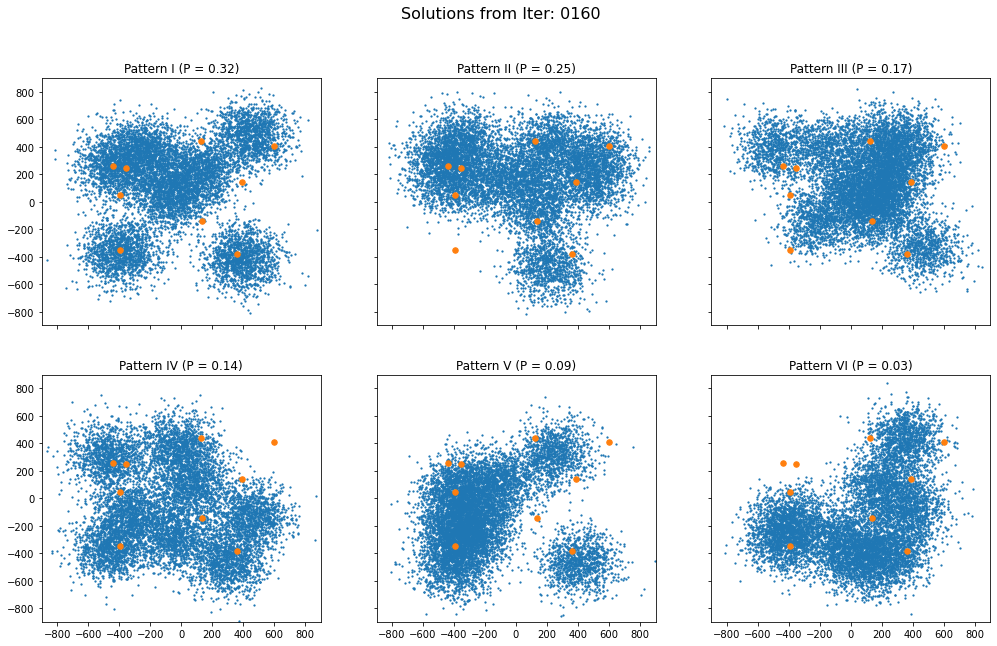

In [44]:
pos = np.array([[s.x, s.y] for s in solutions["solution_obj"].iloc[0].stations])
fig, axs = plt.subplots(2,3, figsize=(17,10), sharex=True, sharey=True)
fig.suptitle(f'Solutions from Iter: {160:04d}', fontsize=16)
plt.xlim(-900, 900)
plt.ylim(-900, 900)

axs[0][0].scatter(data[0][:,0], data[0][:,1], s=1.5)
axs[0][0].scatter(pos[:,0], pos[:,1], s=30)
axs[0][0].set_title("Pattern I (P = 0.32)")

axs[0][1].scatter(data[1][:,0], data[1][:,1], s=1.5)
axs[0][1].scatter(pos[:,0], pos[:,1], s=30)
axs[0][1].set_title("Pattern II (P = 0.25)")

axs[0][2].scatter(data[2][:,0], data[2][:,1], s=1.5)
axs[0][2].scatter(pos[:,0], pos[:,1], s=30)
axs[0][2].set_title("Pattern III (P = 0.17)")

axs[1][0].scatter(data[3][:,0], data[3][:,1], s=1.5)
axs[1][0].scatter(pos[:,0], pos[:,1], s=30)
axs[1][0].set_title("Pattern IV (P = 0.14)")

axs[1][1].scatter(data[4][:,0], data[4][:,1], s=1.5)
axs[1][1].scatter(pos[:,0], pos[:,1], s=30)
axs[1][1].set_title("Pattern V (P = 0.09)")

axs[1][2].scatter(data[5][:,0], data[5][:,1], s=1.5)
axs[1][2].scatter(pos[:,0], pos[:,1], s=30)
axs[1][2].set_title("Pattern VI (P = 0.03)")

In [40]:
[print(x) for x in solutions["solution_obj"].iloc[0].stations]

Station
	Name: 4aa8a939-59b8-4a5a-bd63-7061248433da
	Type: 1800 MHz Type I
	Position: (269.8783063280591, -568.1233315074207)
	Frequency: 1800
	Capacity: 850/850
	Cost: 880000
        
Station
	Name: e437d4d4-1ee2-448b-8659-56a38ccb2777
	Type: 1800 MHz Type II
	Position: (-448.9728126559626, 258.05078897110593)
	Frequency: 1800
	Capacity: 1200/1250
	Cost: 1220000
        
Station
	Name: d286109f-2f7c-4b55-a8ca-6e73f2e6e3ea
	Type: 1800 MHz Type I
	Position: (335.28819103181127, 204.67463734871444)
	Frequency: 1800
	Capacity: 850/850
	Cost: 880000
        
Station
	Name: 3d5dd15c-c1a7-4805-b3cb-e7613a30bf8e
	Type: 1800 MHz Type II
	Position: (-161.50661014118748, 302.93349260566424)
	Frequency: 1800
	Capacity: 1250/1250
	Cost: 1220000
        
Station
	Name: 324cb01d-3e72-4bbb-9948-4a642e0b2f39
	Type: 1800 MHz Type II
	Position: (-48.04789712726517, -160.19930890406965)
	Frequency: 1800
	Capacity: 1250/1250
	Cost: 1220000
        
Station
	Name: 6c7c4371-c719-4d94-8e14-a5eb5445c4e7
	Type

[None, None, None, None, None, None, None, None, None]